<a href="https://colab.research.google.com/github/in3xes/CAP5610/blob/master/homework6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install surprise

     |████████████████████████████████| 11.8MB 5.2MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-linux_x86_64.whl size=1670916 sha256=31ccf3ed70542ba1154be0ecd4f36465d0d195fbda7b9867490c233992c1e3c9
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [10]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms.knns import KNNBasic, KNNWithMeans
from surprise import Reader

import pandas as pd

df = pd.read_csv('/content/ratings_small.csv')
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

# **Question 3.c**

In [11]:
algo = SVD(biased=False)

result_pmf = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0121  1.0011  1.0040  1.0092  1.0016  1.0056  0.0044  
MAE (testset)     0.7841  0.7731  0.7745  0.7765  0.7737  0.7764  0.0040  
Fit time          4.89    4.85    4.84    4.96    4.85    4.88    0.05    
Test time         0.19    0.12    0.12    0.19    0.19    0.16    0.03    


In [12]:
sim_options_user_msd = {'name': 'MSD', 'user_based': True}

algo_CF_user_msd = KNNWithMeans(sim_options=sim_options_user_msd, verbose=False)

result_CF_user_msd = cross_validate(algo_CF_user_msd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9193  0.9256  0.9133  0.9260  0.9151  0.9199  0.0052  
MAE (testset)     0.7031  0.7085  0.7022  0.7092  0.6989  0.7044  0.0039  
Fit time          0.15    0.18    0.20    0.20    0.19    0.19    0.02    
Test time         1.94    1.78    1.90    1.94    1.80    1.87    0.07    


In [13]:
sim_options_item_msd = {'name': 'MSD', 'user_based': False}

algo_CF_item_msd = KNNWithMeans(sim_options=sim_options_item_msd, verbose=False)

result_CF_item_msd = cross_validate(algo_CF_item_msd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9140  0.9169  0.9232  0.9163  0.9118  0.9164  0.0038  
MAE (testset)     0.6998  0.7022  0.7072  0.7034  0.6981  0.7021  0.0031  
Fit time          5.04    4.64    4.10    4.07    4.44    4.46    0.36    
Test time         6.99    7.36    7.33    7.11    7.31    7.22    0.15    


# **Question 3.d**

[0.01987422699432817, 0.016429514528135125, 0.10559651016552085]


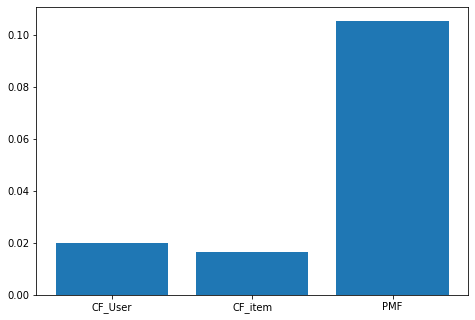

In [14]:
from statistics import mean
import matplotlib.pyplot as plt

def get_perf(res):
  return (mean(res)-0.9)


perf_mean = [get_perf(result_CF_user_msd['test_rmse']), get_perf(result_CF_item_msd['test_rmse']), get_perf(result_pmf['test_rmse'])]

print(perf_mean)

algos = ['CF_User', 'CF_item', 'PMF']

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(algos,perf_mean)
plt.show()

[0.004370507201240881, 0.0021280501790270634, 0.07637489402306541]


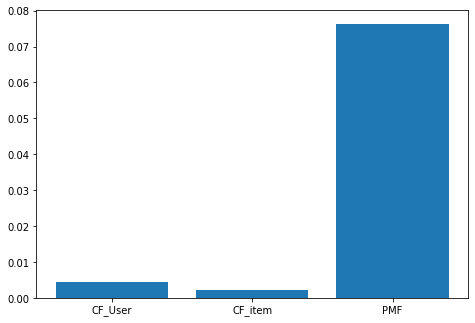

In [15]:
from statistics import mean
import matplotlib.pyplot as plt

def get_perf(res):
  return (mean(res)-0.6)


perf_mean = [get_perf(result_CF_user_msd['test_mae']), get_perf(result_CF_item_msd['test_mae']), get_perf(result_pmf['test_mae'])]

print(perf_mean)

algos = ['CF_User', 'CF_item', 'PMF']

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(algos,perf_mean)
plt.show()

# **Question 3.e**

In [16]:
sim_options_user = {'name': 'cosine', 'user_based': True}

algo_CF_user = KNNWithMeans(sim_options=sim_options_user, verbose=False)

result_CF_user_cosine = cross_validate(algo_CF_user, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9210  0.9230  0.9214  0.9259  0.9248  0.9232  0.0019  
MAE (testset)     0.7017  0.7072  0.7073  0.7107  0.7093  0.7072  0.0030  
Fit time          0.40    0.42    0.41    0.41    0.41    0.41    0.01    
Test time         1.90    1.77    1.77    1.86    1.77    1.81    0.06    


In [17]:
sim_options_item = {'name': 'cosine', 'user_based': False}

algo_CF_item = KNNWithMeans(sim_options=sim_options_item, verbose=False)

result_CF_item_cosine = cross_validate(algo_CF_item, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9251  0.9189  0.9309  0.9254  0.9364  0.9273  0.0059  
MAE (testset)     0.7092  0.7026  0.7127  0.7110  0.7157  0.7103  0.0044  
Fit time          13.75   13.82   13.39   13.64   13.44   13.61   0.17    
Test time         6.84    7.11    7.06    6.97    7.09    7.01    0.10    


In [18]:
sim_options_user_pearson = {'name': 'pearson_baseline', 'user_based': True}

algo_CF_user_pearson = KNNWithMeans(sim_options=sim_options_user_pearson, verbose=False)

result_CF_user_pearson = cross_validate(algo_CF_user_pearson, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9325  0.9188  0.9227  0.9256  0.9160  0.9231  0.0057  
MAE (testset)     0.7092  0.7018  0.6995  0.7023  0.6939  0.7013  0.0049  
Fit time          0.70    0.71    0.71    0.72    0.71    0.71    0.01    
Test time         1.66    1.81    1.65    1.80    1.65    1.72    0.07    


In [19]:
sim_options_item_pearson = {'name': 'pearson_baseline', 'user_based': False}

algo_CF_item_pearson = KNNWithMeans(sim_options=sim_options_item_pearson, verbose=False)

result_CF_item_pearson = cross_validate(algo_CF_item_pearson, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8985  0.9097  0.9065  0.9077  0.8990  0.9043  0.0046  
MAE (testset)     0.6838  0.6916  0.6913  0.6895  0.6827  0.6878  0.0038  
Fit time          8.62    8.53    8.55    8.55    8.56    8.56    0.03    
Test time         6.78    6.85    6.71    6.94    6.86    6.83    0.08    


[0.01987422699432817, 0.023192141302636138, 0.023128720767045752]


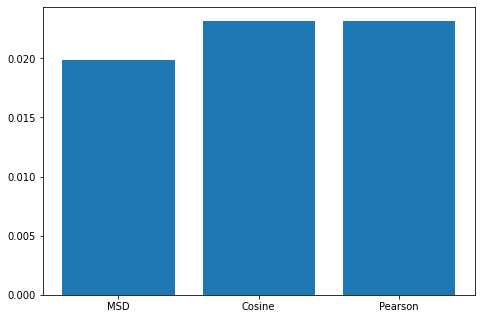

In [20]:
from statistics import mean
import matplotlib.pyplot as plt

def get_perf(res):
  return (mean(res)-0.9)


perf_mean = [get_perf(result_CF_user_msd['test_rmse']), get_perf(result_CF_user_cosine['test_rmse']), get_perf(result_CF_user_pearson['test_rmse'])]

print(perf_mean)

algos = ['MSD', 'Cosine', 'Pearson']

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(algos,perf_mean)
plt.show()

[0.016429514528135125, 0.02733432444049133, 0.004252545046199652]


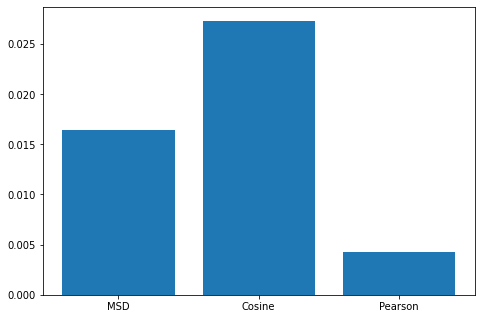

In [21]:
from statistics import mean
import matplotlib.pyplot as plt

def get_perf(res):
  return (mean(res)-0.9)


perf_mean = [get_perf(result_CF_item_msd['test_rmse']), get_perf(result_CF_item_cosine['test_rmse']), get_perf(result_CF_item_pearson['test_rmse'])]

print(perf_mean)

algos = ['MSD', 'Cosine', 'Pearson']

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(algos,perf_mean)
plt.show()

[0.004370507201240881, 0.007235980965113131, 0.0013490031807067426]


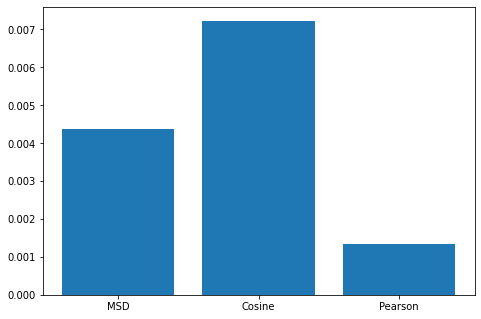

In [22]:
from statistics import mean
import matplotlib.pyplot as plt

def get_perf(res):
  return (mean(res)-0.6)


perf_mean = [get_perf(result_CF_user_msd['test_mae']), get_perf(result_CF_user_cosine['test_mae']), get_perf(result_CF_user_pearson['test_mae'])]

print(perf_mean)

algos = ['MSD', 'Cosine', 'Pearson']

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(algos,perf_mean)
plt.show()

[0.10212805017902704, 0.11025467370092623, 0.08777960927007467]


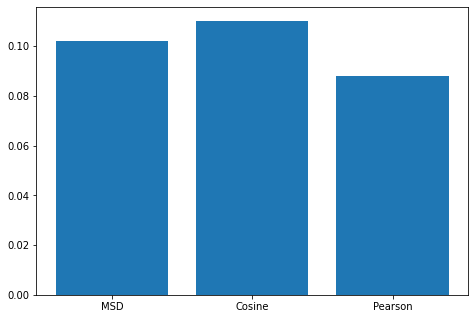

In [25]:
from statistics import mean
import matplotlib.pyplot as plt

def get_perf(res):
  return (mean(res)-0.6)


perf_mean = [get_perf(result_CF_item_msd['test_mae']), get_perf(result_CF_item_cosine['test_mae']), get_perf(result_CF_item_pearson['test_mae'])]

print(perf_mean)

algos = ['MSD', 'Cosine', 'Pearson']

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(algos,perf_mean)
plt.show()

# **Question 3.f**

K :  5
RMSE: 0.9689
K :  10
RMSE: 0.9414
K :  15
RMSE: 0.9340
K :  20
RMSE: 0.9307
K :  25
RMSE: 0.9290
K :  30
RMSE: 0.9283
K :  35
RMSE: 0.9282
K :  40
RMSE: 0.9282
K :  45
RMSE: 0.9280
K :  50
RMSE: 0.9281
K :  55
RMSE: 0.9282
K :  60
RMSE: 0.9283
K :  65
RMSE: 0.9284
K :  70
RMSE: 0.9285
K :  75
RMSE: 0.9287
K :  80
RMSE: 0.9288
K :  85
RMSE: 0.9290
K :  90
RMSE: 0.9291
K :  95
RMSE: 0.9292
K :  100
RMSE: 0.9292
K :  105
RMSE: 0.9293
K :  110
RMSE: 0.9293
K :  115
RMSE: 0.9294
K :  120
RMSE: 0.9294
K :  125
RMSE: 0.9295
K :  130
RMSE: 0.9295
K :  135
RMSE: 0.9296
K :  140
RMSE: 0.9296
K :  145
RMSE: 0.9296
K :  150
RMSE: 0.9296


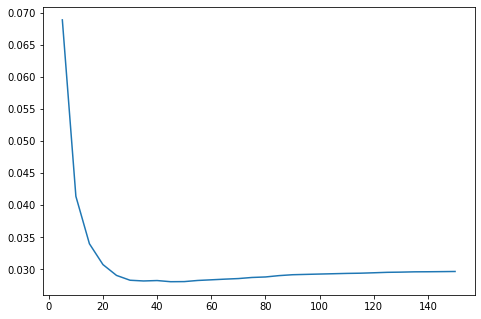

In [26]:
from surprise.model_selection import train_test_split
from surprise import accuracy


trainset, testset = train_test_split(data, test_size=.25)

results_k_user = []
k = [x*5 for x in range(1, 41)]

for input_k in k:
  print("K : ", input_k)
  algo = KNNWithMeans(k=input_k, sim_options=sim_options_user_msd, verbose=False)

  algo.fit(trainset)
  predictions = algo.test(testset)

  results_k_user.append((accuracy.rmse(predictions)-0.9))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(k,results_k_user)
plt.show()

K :  5
RMSE: 0.9721
K :  10
RMSE: 0.9382
K :  15
RMSE: 0.9266
K :  20
RMSE: 0.9203
K :  25
RMSE: 0.9167
K :  30
RMSE: 0.9141
K :  35
RMSE: 0.9121
K :  40
RMSE: 0.9113
K :  45
RMSE: 0.9104
K :  50
RMSE: 0.9096
K :  55
RMSE: 0.9092
K :  60
RMSE: 0.9087
K :  65
RMSE: 0.9084
K :  70
RMSE: 0.9083
K :  75
RMSE: 0.9081
K :  80
RMSE: 0.9080
K :  85
RMSE: 0.9080
K :  90
RMSE: 0.9079
K :  95
RMSE: 0.9076
K :  100
RMSE: 0.9076
K :  105
RMSE: 0.9076
K :  110
RMSE: 0.9076
K :  115
RMSE: 0.9076
K :  120
RMSE: 0.9076
K :  125
RMSE: 0.9076
K :  130
RMSE: 0.9076
K :  135
RMSE: 0.9076
K :  140
RMSE: 0.9075
K :  145
RMSE: 0.9075
K :  150
RMSE: 0.9075


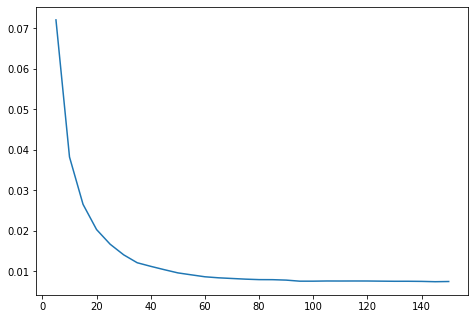

In [27]:
from surprise.model_selection import train_test_split
from surprise import accuracy


trainset, testset = train_test_split(data, test_size=.25)

results_k_item = []
k = [x*5 for x in range(1, 41)]

for input_k in k:
  print("K : ", input_k)

  algo = KNNWithMeans(k=input_k, sim_options=sim_options_item_msd, verbose=False)

  algo.fit(trainset)
  predictions = algo.test(testset)

  results_k_item.append((accuracy.rmse(predictions)-0.9))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(k, results_k_item)
plt.show()

K :  5
MAE:  0.7342
K :  10
MAE:  0.7122
K :  15
MAE:  0.7062
K :  20
MAE:  0.7026
K :  25
MAE:  0.7007
K :  30
MAE:  0.6994
K :  35
MAE:  0.6988
K :  40
MAE:  0.6985
K :  45
MAE:  0.6985
K :  50
MAE:  0.6984
K :  55
MAE:  0.6984
K :  60
MAE:  0.6987
K :  65
MAE:  0.6987
K :  70
MAE:  0.6987
K :  75
MAE:  0.6988
K :  80
MAE:  0.6988
K :  85
MAE:  0.6988
K :  90
MAE:  0.6989
K :  95
MAE:  0.6988
K :  100
MAE:  0.6989
K :  105
MAE:  0.6989
K :  110
MAE:  0.6990
K :  115
MAE:  0.6990
K :  120
MAE:  0.6990
K :  125
MAE:  0.6991
K :  130
MAE:  0.6991
K :  135
MAE:  0.6991
K :  140
MAE:  0.6992
K :  145
MAE:  0.6992
K :  150
MAE:  0.6993


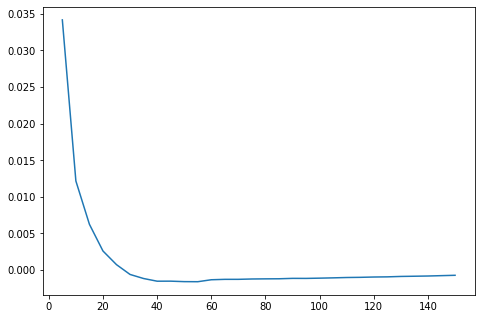

In [28]:
from surprise.model_selection import train_test_split
from surprise import accuracy


trainset, testset = train_test_split(data, test_size=.25)

results_k_user = []
k = [x*5 for x in range(1, 41)]

for input_k in k:
  print("K : ", input_k)
  algo = KNNWithMeans(k=input_k, sim_options=sim_options_user_msd, verbose=False)

  algo.fit(trainset)
  predictions = algo.test(testset)

  results_k_user.append((accuracy.mae(predictions)-0.6))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(k,results_k_user)
plt.show()

K :  5
MAE:  0.7458
K :  10
MAE:  0.7199
K :  15
MAE:  0.7105
K :  20
MAE:  0.7045
K :  25
MAE:  0.7013
K :  30
MAE:  0.6991
K :  35
MAE:  0.6973
K :  40
MAE:  0.6963
K :  45
MAE:  0.6956
K :  50
MAE:  0.6951
K :  55
MAE:  0.6946
K :  60
MAE:  0.6943
K :  65
MAE:  0.6941
K :  70
MAE:  0.6940
K :  75
MAE:  0.6935
K :  80
MAE:  0.6933
K :  85
MAE:  0.6932
K :  90
MAE:  0.6930
K :  95
MAE:  0.6927
K :  100
MAE:  0.6926
K :  105
MAE:  0.6925
K :  110
MAE:  0.6924
K :  115
MAE:  0.6923
K :  120
MAE:  0.6923
K :  125
MAE:  0.6922
K :  130
MAE:  0.6921
K :  135
MAE:  0.6920
K :  140
MAE:  0.6921
K :  145
MAE:  0.6921
K :  150
MAE:  0.6920


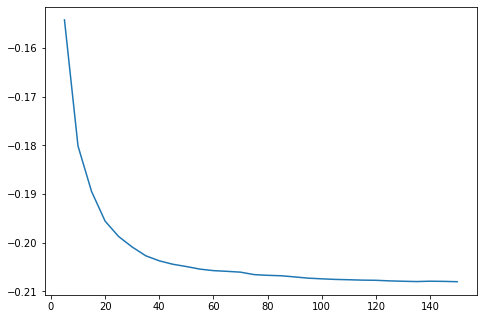

In [29]:
from surprise.model_selection import train_test_split
from surprise import accuracy


trainset, testset = train_test_split(data, test_size=.25)

results_k_item = []
k = [x*5 for x in range(1, 41)]

for input_k in k:
  print("K : ", input_k)

  algo = KNNWithMeans(k=input_k, sim_options=sim_options_item_msd, verbose=False)

  algo.fit(trainset)
  predictions = algo.test(testset)

  results_k_item.append((accuracy.mae(predictions)-0.6))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(k, results_k_item)
plt.show()

# **Question 3.g**

In [30]:
from surprise.model_selection import GridSearchCV

k = [x*5 for x in range(1, 31)]

param_grid_user = {'k': k,
              'sim_options': {'user_based': [True]},
              'verbose' : [False]
              }

gs_user = GridSearchCV(KNNWithMeans, param_grid_user, measures=['rmse'], cv=3)

gs_user.fit(data)

print(gs_user.best_score['rmse'])
print(gs_user.best_params['rmse'])

0.9282510930106699
{'k': 40, 'sim_options': {'user_based': True}, 'verbose': False}


In [ ]:
from surprise.model_selection import GridSearchCV

k = [x*5 for x in range(1, 31)]
param_grid_item = {'k': k,
              'sim_options': {'user_based': [False]},
              'verbose' : [False]
              }

gs_item = GridSearchCV(KNNWithMeans, param_grid_item, measures=['rmse', 'mae'], cv=3)

gs_item.fit(data)

print(gs_item.best_score['rmse'])
print(gs_item.best_params['rmse'])